<a href="https://colab.research.google.com/github/eshal26/Leukemia-classification/blob/main/resnet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip train_dataset.zip

Archive:  train_dataset.zip
   creating: test_dataset/Benign/
  inflating: test_dataset/Benign/WBC-Benign-003.jpg  
  inflating: test_dataset/Benign/WBC-Benign-010.jpg  
  inflating: test_dataset/Benign/WBC-Benign-018.jpg  
  inflating: test_dataset/Benign/WBC-Benign-024.jpg  
  inflating: test_dataset/Benign/WBC-Benign-025.jpg  
  inflating: test_dataset/Benign/WBC-Benign-026.jpg  
  inflating: test_dataset/Benign/WBC-Benign-031.jpg  
  inflating: test_dataset/Benign/WBC-Benign-040.jpg  
  inflating: test_dataset/Benign/WBC-Benign-057.jpg  
  inflating: test_dataset/Benign/WBC-Benign-064.jpg  
  inflating: test_dataset/Benign/WBC-Benign-071.jpg  
  inflating: test_dataset/Benign/WBC-Benign-074.jpg  
  inflating: test_dataset/Benign/WBC-Benign-076.jpg  
  inflating: test_dataset/Benign/WBC-Benign-080.jpg  
  inflating: test_dataset/Benign/WBC-Benign-083.jpg  
  inflating: test_dataset/Benign/WBC-Benign-091.jpg  
  inflating: test_dataset/Benign/WBC-Benign-105.jpg  
  inflating: test_da

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,  ConfusionMatrixDisplay

In [3]:
from torch.utils.data import DataLoader

# Define paths to your dataset directories
train_dir = 'train_dataset'
val_dir = 'validation_dataset'
test_dir = 'test_dataset'

# Define transformations for training, validation, and testing data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=val_test_transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=val_test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [9]:
# Loading the pre-trained ResNet101 model
model = torchvision.models.resnet101(pretrained=True)

# Freezing parameters of the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Modifying the final fully connected layer for binary classification
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 2)  # Binary classification with 2 output units

# Moving model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Defining loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)  # Only train the final layer

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15, Training Loss: 0.2067, Training Accuracy: 0.9205, Validation Loss: 0.0957, Validation Accuracy: 0.9796
Epoch 2/15, Training Loss: 0.0870, Training Accuracy: 0.9750, Validation Loss: 0.0614, Validation Accuracy: 0.9877
Epoch 3/15, Training Loss: 0.0753, Training Accuracy: 0.9759, Validation Loss: 0.0514, Validation Accuracy: 0.9918
Epoch 4/15, Training Loss: 0.0605, Training Accuracy: 0.9794, Validation Loss: 0.0526, Validation Accuracy: 0.9898
Epoch 5/15, Training Loss: 0.0426, Training Accuracy: 0.9890, Validation Loss: 0.0468, Validation Accuracy: 0.9857
Epoch 6/15, Training Loss: 0.0434, Training Accuracy: 0.9877, Validation Loss: 0.0364, Validation Accuracy: 0.9877
Epoch 7/15, Training Loss: 0.0423, Training Accuracy: 0.9873, Validation Loss: 0.0478, Validation Accuracy: 0.9857
Epoch 8/15, Training Loss: 0.0344, Training Accuracy: 0.9877, Validation Loss: 0.0432, Validation Accuracy: 0.9898
Epoch 9/15, Training Loss: 0.0370, Training Accuracy: 0.9903, Validation Loss: 0

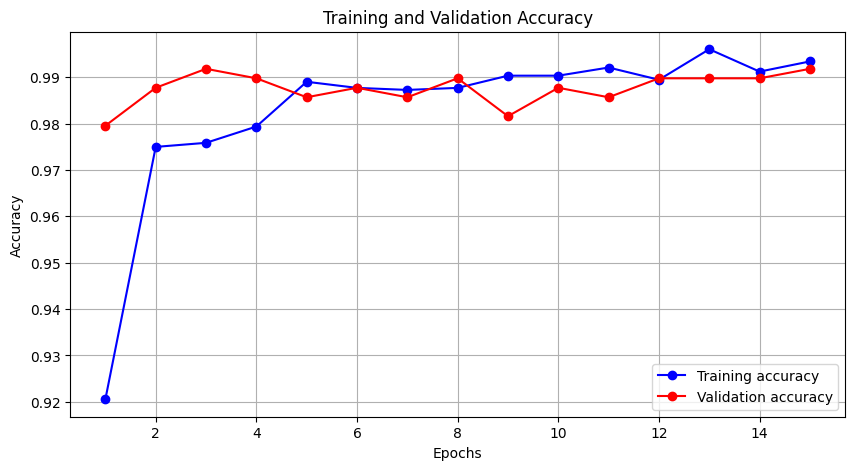

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Function to plot training and validation accuracy
def plot_training_results(train_acc_history, val_acc_history):
    epochs = range(1, len(train_acc_history) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_acc_history, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc_history, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Training loop
num_epochs = 15
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    train_acc_history.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct_val / total_val
    val_acc_history.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Ploting training results
plot_training_results(train_acc_history, val_acc_history)



In [11]:
def evaluate_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (preds == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = correct / total
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

# Ensuring to call the function with the test loader
evaluate_model(model, test_loader, device)


Accuracy: 0.9836
Precision: 0.9789
Recall: 0.9581
F1-score: 0.9682


In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
model_path = "/content/drive/MyDrive/resnet101.pth"
torch.save(model, model_path)